In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() 
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin

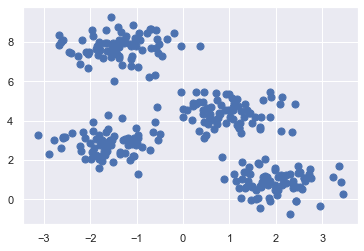

In [4]:
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [5]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

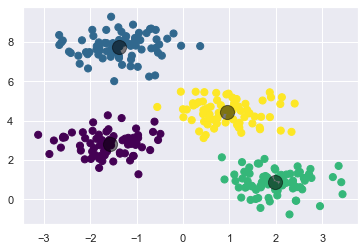

In [6]:
plt.scatter(X[:, 0], X[:, 1], c = y_kmeans, s = 50, cmap = 'viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'black', s = 200, alpha = 0.5);

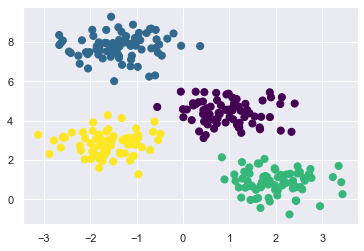

In [7]:

def find_clusters(X, n_clusters, rseed=2):
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        labels = pairwise_distances_argmin(X, centers)
        
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
        
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c = labels, s = 50, cmap = 'viridis');

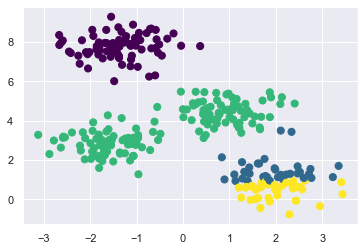

In [8]:
centers, labels = find_clusters(X, 4, rseed = 0)
plt.scatter(X[:, 0], X[:, 1], c = labels, s = 50, cmap = 'viridis');

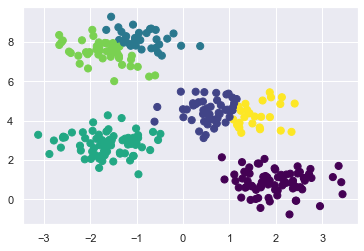

In [9]:
labels = KMeans(6, random_state = 0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c = labels, s = 50, cmap = 'viridis');